In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection  import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
(images_train, cls_train), (images_test, cls_test) = cifar10.load_data()

In [3]:
images_train.shape, images_test.shape, cls_train.shape, cls_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [4]:
x_train = images_train.reshape(images_train.shape[0], -1).astype('float32') / 255
x_test = images_test.reshape(images_test.shape[0], -1).astype('float32') / 255

y_train = cls_train.reshape(cls_train.shape[0])
y_test = cls_test.reshape(cls_test.shape[0])

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [5]:
import matplotlib.pyplot as plt

def plot_gallery(images, titles, size=8):
    plt.figure(figsize=(size, size))

    for i in range(size * size):
        plt.subplot(size, size, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')

    plt.show()

In [6]:
def best_k(x_train, total_info_required=0.9):
    pca = PCA()

    pca.fit(x_train)

    total_var = sum(pca.explained_variance_)
    variance = 0
    k = 0

    while variance / total_var < total_info_required:
        variance += pca.explained_variance_[k]
        k += 1

    return k

In [7]:
pca = PCA(n_components=best_k(x_train, total_info_required=0.5))

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

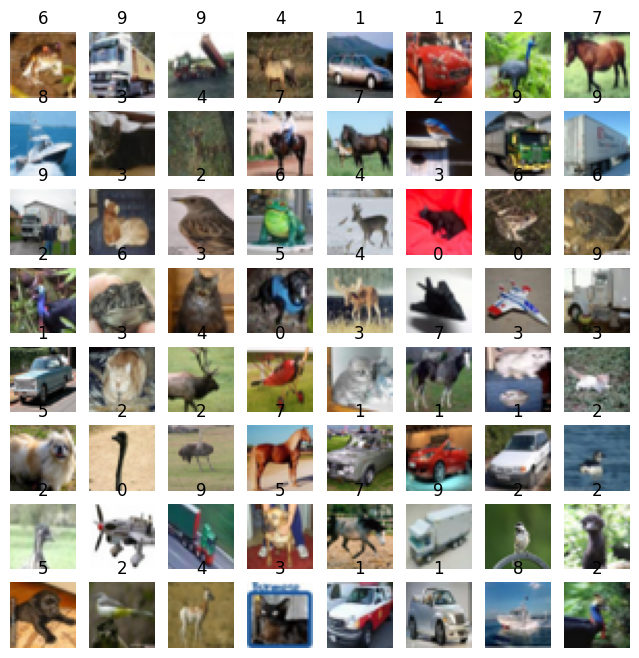

In [8]:
plot_gallery(images_train, y_train, size=8)

In [9]:
param_dist = {
    'C': [1, 10, 100, 1000],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.0001]
}

svc = RandomizedSearchCV(
    SVC(),
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    verbose=1
)

svc.fit(x_train_pca, y_train)

svc.score(x_test_pca, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 